### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

### Loading the Processed Data

In [3]:
df_processed = pd.read_csv('../data/heart_disease_processed.csv')
print(df_processed.head())

        age       sex        cp  trestbps  ...     slope        ca      thal  target
0  0.948726  0.686202 -2.251775  0.757525  ...  2.274579 -0.711131  0.660004       0
1  1.392002  0.686202  0.877985  1.611220  ...  0.649113  2.504881 -0.890238       2
2  1.392002  0.686202  0.877985 -0.665300  ...  0.649113  1.432877  1.176752       1
3 -1.932564  0.686202 -0.165268 -0.096170  ...  2.274579 -0.711131 -0.890238       0
4 -1.489288 -1.457296 -1.208521 -0.096170  ... -0.976352 -0.711131 -0.890238       0

[5 rows x 14 columns]


In [4]:
X = df_processed.drop('target', axis=1)
y = df_processed['target']

In [5]:
pca = PCA()
X_transformed = pca.fit_transform(X)

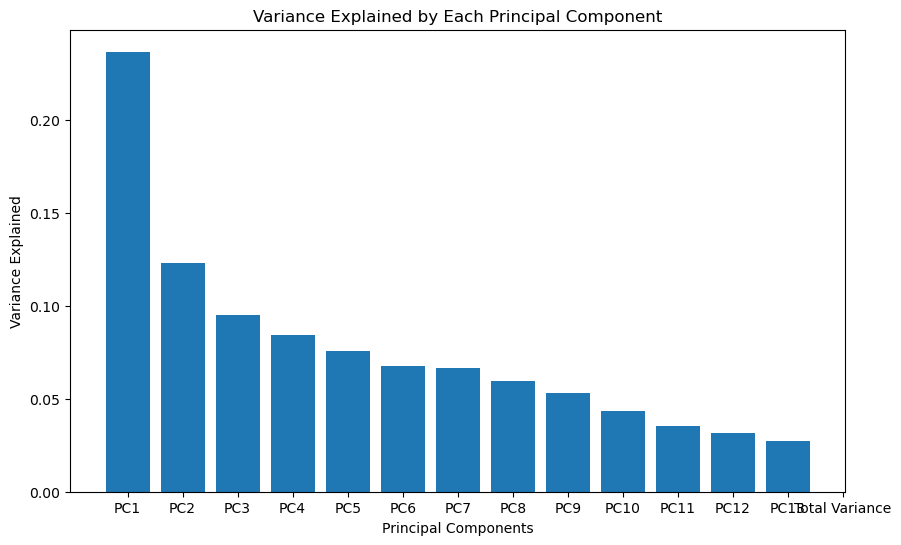

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(len(pca.explained_variance_ratio_) + 1), [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))] + ['Total Variance'])
plt.show()

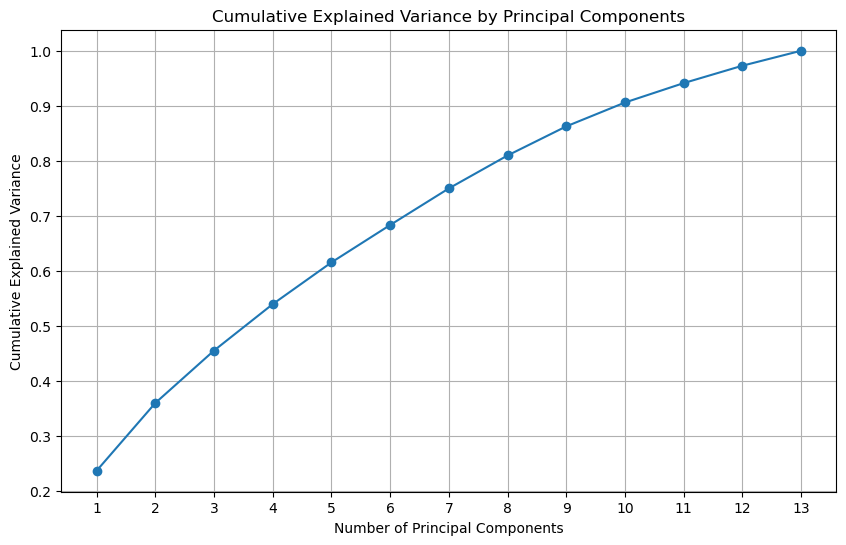

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

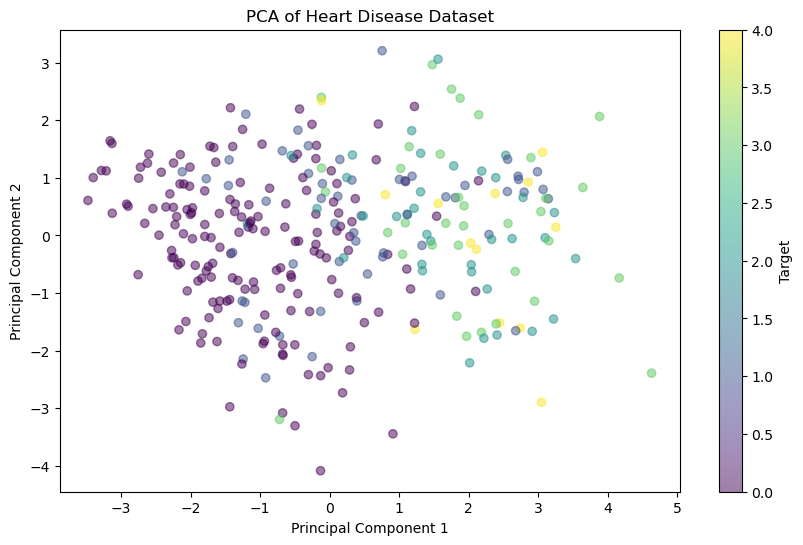

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart Disease Dataset')
plt.show()

In [17]:
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_reduced = pca.fit_transform(X)

print(f"Original shape: {X.shape}, Reduced shape: {X_reduced.shape}")

Original shape: (303, 13), Reduced shape: (303, 12)


In [18]:
df_pca = pd.DataFrame(X_reduced)
df_pca['target'] = y.values
df_pca.to_csv('../data/heart_disease_pca.csv', index=False)